#### Linewidth Roughness (LWR) and Line Edge Roughness (LER) Analysis

In [13]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

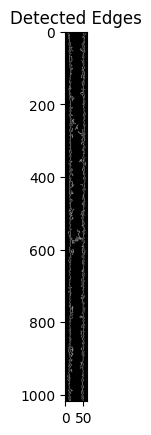

In [14]:
image = cv.imread("../Images/sample 2.png", cv.IMREAD_GRAYSCALE)
blurred = cv.GaussianBlur(image, (5, 5), 0)
edges = cv.Canny(blurred, 50, 150)

plt.imshow(edges, cmap="gray")
plt.title("Detected Edges")
plt.show()


In [15]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1018, 60), dtype=uint8)

In [16]:
len(np.where(edges[500, :] > 0)[0])

6

In [17]:
height, width = edges.shape

left_edge = []
right_edge = []
line_edges = []

for y in range(height):
    row = np.where(edges[y, :] > 0)[0]
    
    if len(row) > 0:
        left_edge.append([y, row[0]]) 
        right_edge.append([y, row[-1]])


left_edge = np.array(left_edge)
right_edge = np.array(right_edge)

In [22]:
right_edge[600] - left_edge[600]

array([ 0, 40])

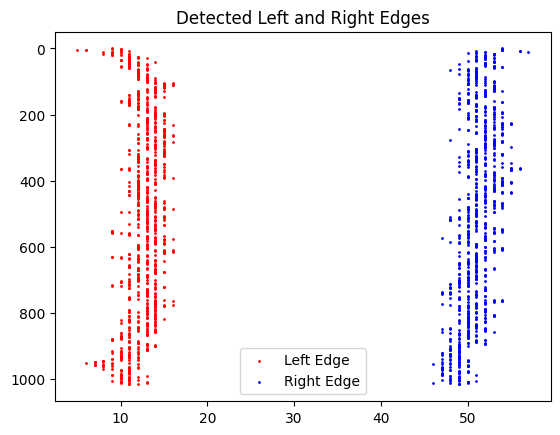

In [19]:
plt.scatter(left_edge[:, 1], left_edge[:, 0], c="red", s=1, label="Left Edge")
plt.scatter(right_edge[:, 1], right_edge[:, 0], c="blue", s=1, label="Right Edge")
plt.gca().invert_yaxis()
plt.legend()
plt.title("Detected Left and Right Edges")
plt.show()

In [20]:
mean_left_edge = np.mean(right_edge[:, 1])

ler = np.std(right_edge[:, 1])

print(f"LER: {ler:.4f} pixels")


LER: 1.8236 pixels


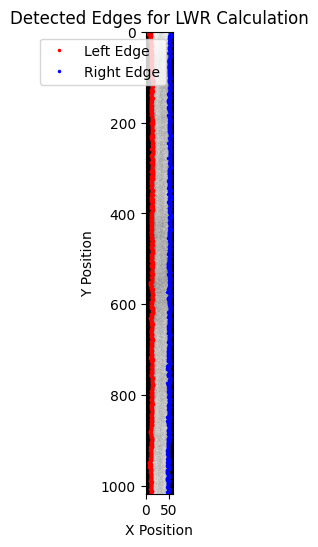

In [21]:
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray')
plt.plot( left_edge[:, 1],left_edge[:, 0], 'r.', markersize=3, label="Left Edge")
plt.plot(right_edge[:, 1],right_edge[:, 0],  'b.', markersize=3, label="Right Edge")
plt.legend()
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.title("Detected Edges for LWR Calculation")
plt.show()
